<a href="https://colab.research.google.com/github/RodrigoSchneiderbr/bootcamp-Ciencia-de-dados/blob/main/big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as srn


In [5]:
dados = pd.read_csv("base_custo_diaria - TP.csv", sep = ";")

In [6]:
dados

,qtd_pessoas,valor_diaria
0,1,150
1,3,200
2,4,650
3,6,499
4,7,549
5,10,980
6,12,700
7,13,735
8,15,859
9,16,900


In [8]:
dados.shape

(30, 2)

In [7]:
sc = StandardScaler

In [9]:
dados.describe()

,qtd_pessoas,valor_diaria
count,30.000000,30.000000
mean,28.600000,1648.633333
std,18.189804,950.522197
min,1.000000,150.000000
25%,13.500000,869.250000
50%,26.000000,1627.500000
75%,44.500000,2497.000000
max,60.000000,3300.000000


Variavel independente


In [11]:
dados_x = dados.iloc[:,0].values
dados_x

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

Variavel Dependente

In [10]:
dados_y = dados.iloc[:,1].values
dados_y

array([ 150,  200,  650,  499,  549,  980,  700,  735,  859,  900, 1100,
        989, 1075, 1378, 1500, 1755, 1850, 2500, 2000, 1900, 2089, 2500,
       2250, 2488, 2680, 2803, 2890, 3040, 3150, 3300])

8) Resposta: 0,9786

In [12]:
np.corrcoef(dados_x,dados_y)

array([[1.        , 0.97866601],
       [0.97866601, 1.        ]])

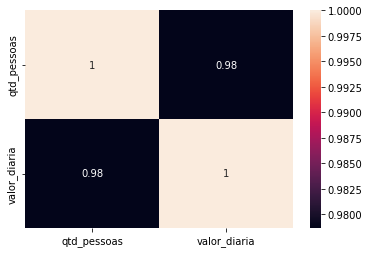

In [13]:
correlation = dados.corr()
plot = srn.heatmap(correlation, annot = True)
plot

In [14]:
correlation = dados.corr()
correlation

,qtd_pessoas,valor_diaria
qtd_pessoas,1.000000,0.978666
valor_diaria,0.978666,1.000000


In [15]:
dados_x.shape

(30,)

In [16]:
dados_x = dados_x.reshape(-1,1)
dados_x

array([[ 1],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [10],
       [12],
       [13],
       [15],
       [16],
       [20],
       [18],
       [22],
       [23],
       [25],
       [27],
       [30],
       [32],
       [33],
       [40],
       [42],
       [43],
       [45],
       [47],
       [50],
       [51],
       [52],
       [53],
       [58],
       [60]])

In [17]:
dados_x.shape

(30, 1)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
previsao = LinearRegression()

In [19]:
previsao.fit(dados_x, dados_y)

LinearRegression()

9) R:186.00

In [20]:
previsao.intercept_

186.00229281307384

In [21]:
previsao_2 = previsao.predict(dados_x)
previsao_2

array([ 237.14323829,  339.42512923,  390.5660747 ,  492.84796565,
        543.98891112,  697.41174754,  799.69363849,  850.83458396,
        953.1164749 , 1004.25742038, 1208.82120227, 1106.53931132,
       1311.10309321, 1362.24403869, 1464.52592963, 1566.80782058,
       1720.230657  , 1822.51254794, 1873.65349341, 2231.64011172,
       2333.92200267, 2385.06294814, 2487.34483909, 2589.62673003,
       2743.04956645, 2794.19051192, 2845.3314574 , 2896.47240287,
       3152.17713023, 3254.45902118])

In [22]:
dados_x.ravel()

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [23]:
grafico = px.scatter(x = dados_x.ravel(), y = dados_y)
grafico.add_scatter(x= dados_x.ravel(), y = previsao_2)
grafico.show()

10 R: no grafico x = 20 apresenta y = 1.100

In [24]:
posicao = 57
previsao.intercept_ + previsao.coef_*posicao

array([3101.03618476])

11 R: 3101


In [25]:
previsao.predict([[25]])

array([1464.52592963])

12 R: 1500 - 1464 = 36

In [ ]:
previsao.score(dados_x,dados_y)

0.9577871649322629

13 R: 0,9577

In [27]:
MSE = mean_absolute_error(dados_y,previsao_2)
MSE

138.91296481574125

14) R: 138.91
